In [6]:
!pip install mysql-connector-python


Defaulting to user installation because normal site-packages is not writeable


In [7]:
import mysql.connector
import pandas as pd

# Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database="heartdb"
)

# Create a cursor and run a query
query = "SELECT * FROM heart LIMIT 5"
df = pd.read_sql(query, conn)

print(df.head())
conn.close()


   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11836\3018839853.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [8]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# Load dataset
df = pd.read_csv("C:\\Users\\Lenovo\\Downloads\\heart.csv")

In [10]:
# Create SQLite connection
conn = sqlite3.connect(":memory:")
df.to_sql("heart", conn, index=False, if_exists='replace')

918

In [11]:
sns.set(style="whitegrid")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11836\4273357380.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='HeartDisease', y='count', data=data1, palette="Set2")


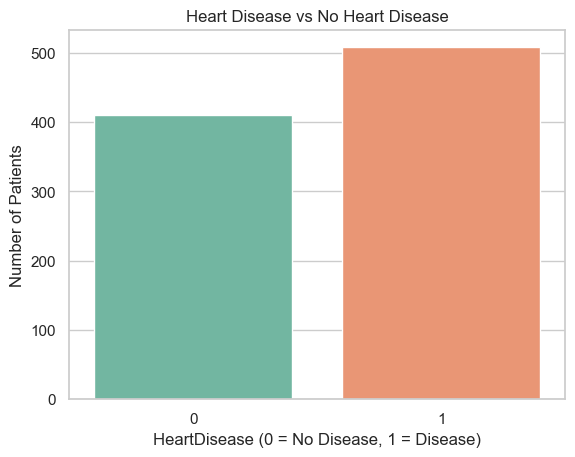

In [12]:
#Count of patients with and without heart disease
query1 = '''
SELECT HeartDisease, COUNT(*) AS count
FROM heart
GROUP BY HeartDisease;
'''

#Bar plot
data1 = pd.read_sql(query1, conn)
sns.barplot(x='HeartDisease', y='count', data=data1, palette="Set2")
plt.title('Heart Disease vs No Heart Disease')
plt.xlabel('HeartDisease (0 = No Disease, 1 = Disease)')
plt.ylabel('Number of Patients')
plt.show()

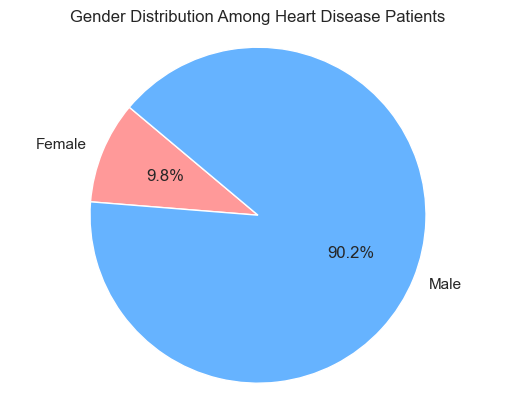

In [13]:
#Gender distribution of heart disease patients
query2 = '''
SELECT sex, COUNT(*) AS count
FROM heart
WHERE HeartDisease = 1
GROUP BY sex;
'''

#Pie Chart: 
data2 = pd.read_sql(query2, conn)
labels = ['Female', 'Male']
plt.pie(data2['count'], labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Gender Distribution Among Heart Disease Patients')
plt.axis('equal')
plt.show()

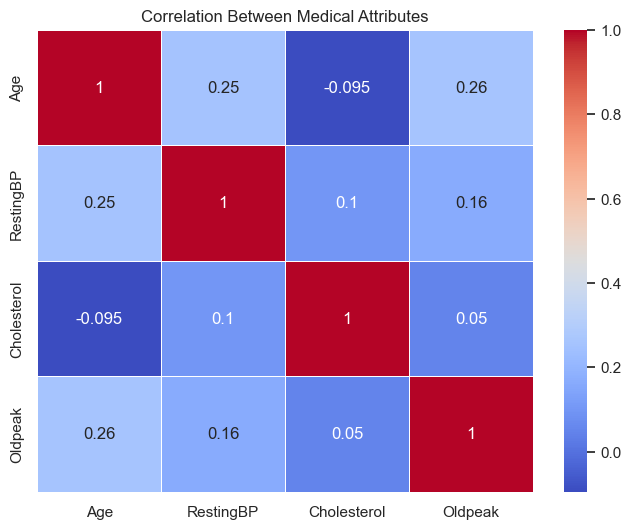

In [14]:
# 4. Heatmap: Correlation matrix for key medical variables
#This heatmap shows how strongly key medical variables like cholesterol, age, and blood pressure 
# are correlated with each other and with heart disease.
query4 = 'SELECT Age, RestingBP, Cholesterol, Oldpeak FROM heart;'

data4 = pd.read_sql(query4, conn)
plt.figure(figsize=(8,6))
corr = data4.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Medical Attributes')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11836\2639893038.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='ChestPainType', data=data3, palette='Oranges_r')


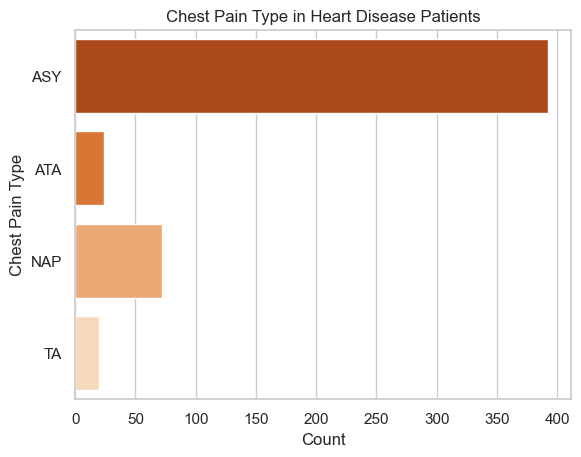

In [15]:
#Chest Pain Type vs Heart Disease (Horizontal Bar Chart)
query3 = '''
SELECT ChestPainType, COUNT(*) AS count
FROM heart
WHERE HeartDisease = 1
GROUP BY ChestPainType;
'''

data3 = pd.read_sql(query3, conn)

sns.barplot(x='count', y='ChestPainType', data=data3, palette='Oranges_r')
plt.title('Chest Pain Type in Heart Disease Patients')
plt.xlabel('Count')
plt.ylabel('Chest Pain Type')
plt.show()

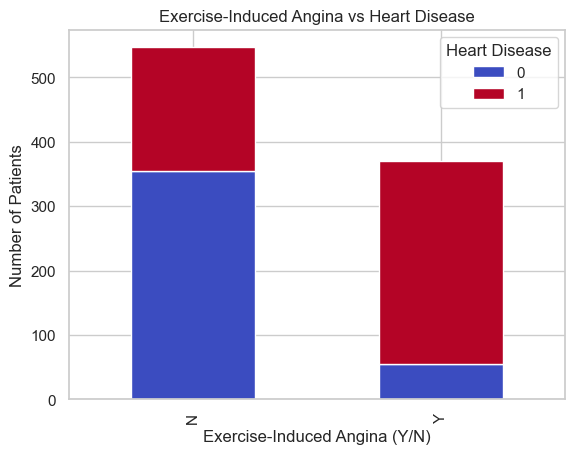

In [16]:
# Exercise-Induced Angina vs Heart Disease (Stacked Bar Chart)
# Query to get the count of patients with and without heart disease based on exercise-induced angina
query5 = '''
SELECT ExerciseAngina, HeartDisease, COUNT(*) AS count
FROM heart
GROUP BY ExerciseAngina, HeartDisease;
'''

data5 = pd.read_sql(query5, conn)

# Pivot the data for stacked bar plot
pivot_df = data5.pivot(index='ExerciseAngina', columns='HeartDisease', values='count').fillna(0)

pivot_df.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Exercise-Induced Angina vs Heart Disease')
plt.xlabel('Exercise-Induced Angina (Y/N)')
plt.ylabel('Number of Patients')
plt.legend(title='Heart Disease')
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11836\3176511982.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='HeartDisease', y='avg_age', data=data1, palette='Blues')


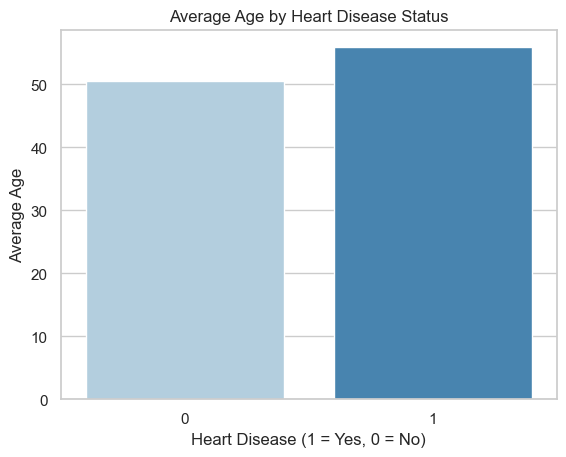

In [17]:
#Average Age by Heart Disease Status (Bar Chart)
query1 = '''
SELECT HeartDisease, AVG(Age) AS avg_age
FROM heart
GROUP BY HeartDisease;
'''

data1 = pd.read_sql(query1, conn)

sns.barplot(x='HeartDisease', y='avg_age', data=data1, palette='Blues')
plt.title('Average Age by Heart Disease Status')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Average Age')
plt.show()